# Time and Space complexity Queue : List vs Linked List

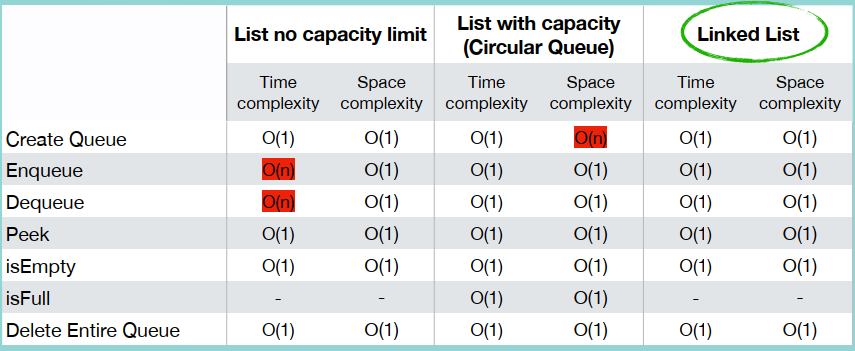

# Python Queue Models

In Python, we can create a queue using different built-in modules:
1. **Collections** module
2. **Queue** module
3. **Multiprocessing** module

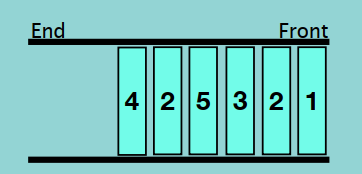

# Collections module

The `collections.deque` class implements a double-ended queue, which supports adding and removing elements from either end in `O(1)` time complexity.
* The `collections.deque` objects are implemented as a double-linked list, which gives them excellent performance from enqueuing & dequeuing elements.
* Because dequeue supports adding and removing elements from either end equally well, it can serve as both a queue and a stack.

There are many methods of `collections.deque` class, but we'll focus on the following methods for creating a **FIFO queue**:
* `deque()` - used to initialize the **dequeue object** with or without capacity.
    *  This method has a `maxlen` parameter.
    *  If specified, then it will create a queue of specified capacity. (**Circular Queue**)
    *  If not specified, then it will create a queue without capacity.
* `append()` - equivalent to the **enqueue** method.
* `popleft()` - equivalent to the **dequeue** method.
* `clear()` - used to remove all elements from the queue.



In [13]:
from collections import deque

customQueue = deque(maxlen=3)
print(customQueue, "\n")

customQueue.append(1)
customQueue.append(2)
customQueue.append(3)
print(customQueue, "\n")

print("adding task after queue is FULL")
customQueue.append(4)
print(customQueue, "\n")

print("Popped task {}".format(customQueue.popleft()))
print(customQueue, "\n")

print(customQueue.clear())
print(customQueue, "\n")

deque([], maxlen=3) 

deque([1, 2, 3], maxlen=3) 

adding task after queue is FULL
deque([2, 3, 4], maxlen=3) 

Popped task 2
deque([3, 4], maxlen=3) 

None
deque([], maxlen=3) 



# Queue module

**Queue** module implements multi-producer, multi-consumer queues.
* It is especially useful in multi-threaded programming when information must be exchanged safely between multiple threads.
* The `dequeue` class in this module implements all the required looping semantics, and it depends on the availability of thread support in Python.
* This module implements three types of queues, which differ only in the order in which entries are retrieved.
    * For a **FIFO** queue, the first task added is retrieved first.
    * For a **LIFO** queue, the last task added is retrieved first.
    * For a **Priority** queue, the entries are kept sorted, and the lowest value entry is retrieved first.

Here, we'll look at the **FIFO** queue only.
* To create a **FIFO** queue, we'll use the `Queue` class.
* `Queue(maxsize=0)` constructor takes `maxsize` argument, which is an integer that sets the upper bound on the number of items that can be placed in the queue.
* Insertion will be blocked once the `maxsize` has been reached; until then, queue items will be consumed.
* If `maxsize` is less than or equal to zero, then the queue size will be infinite.

There are many methods of the `Queue` class, but we'll focus on the following methods for creating a **FIFO queue**:
* `qsize()` - returns the approximate size of the queue.
* `empty()` - returns `True` if the queue is empty, else returns `False`.
* `full()` - returns `True` if the queue is full, else returns `False`.
* `put()` - equivalent to the **enqueue** method. Adding an item to the end of the queue.
* `get()` - equivalent to the **dequeue** method. Removing an item from the beginning of the queue.
* `task_done()` 
    - Indicates that a formally **enqueued task** is complete.
    - Used by the queue **consumer trace**.
    - For each `get()` method call to get a task, a subsequent call to `task_done()` is made to tell the queue that the processing of the task is completed.
* `join()`
    * Blocks adding items (`put()` method call) until all items in the queue are processed, i.e., either retrieved by `get()` call, or marked completed by `task_done()` method.
    * The count of unfinished tasks goes up whenever an item is added to the queue.
    * The count goes down whenever **consumer trace** calls `task_done()` method to indicate that the item was retrieved and all the work on it is completed.
    * When the count of unfinished tasks drops to zero, the join method unblocks. 


In [16]:
import queue as q

customQueue = q.Queue(maxsize=3)
print("Is Empty: {}".format(customQueue.empty()))
print("Queue Size: {}".format(customQueue.qsize()))
print(customQueue, "\n")

customQueue.put(1)
customQueue.put(2)
customQueue.put(3)
print("Queue Size: {}".format(customQueue.qsize()))
print(customQueue, "\n")

print("Is Empty: {}".format(customQueue.empty()))
print("Is Full: {}".format(customQueue.full()))
print("Popped task: {}".format(customQueue.get()))
print("Queue Size: {}".format(customQueue.qsize()))


Is Empty: True
Queue Size: 0

Queue Size: 3

Is Empty: False
Is Full: True
Popped task: 1
Queue Size: 2


# Multiprocessing module

Multiprocessing queue is a shared job queue implementation that allows queue items to be processed in parallel by multiple concurrent workers.

The multiprocessing queue is meant for sharing data between processes and can store any object.

In [18]:
from multiprocessing import Queue

customQueue = Queue(maxsize= 3)
print("Is Empty: {}".format(customQueue.empty()))
print("Queue Size: {}".format(customQueue.qsize()))
print(customQueue, "\n")

customQueue.put(1)
customQueue.put(2)
customQueue.put(3)
print("Queue Size: {}".format(customQueue.qsize()))
print(customQueue, "\n")

print("Is Empty: {}".format(customQueue.empty()))
print("Is Full: {}".format(customQueue.full()))
print("Popped task: {}".format(customQueue.get()))
print("Queue Size: {}".format(customQueue.qsize()))

# Note it doesn't have task_done() & join method.

Is Empty: True
Queue Size: 0

Queue Size: 3

Is Empty: False
Is Full: True
Popped task: 1
Queue Size: 2
